In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cwd = os.getcwd()
fall = pd.read_csv(cwd +'/seasons/fall.csv')
spring = pd.read_csv(cwd +'/seasons/spring.csv')
summer = pd.read_csv(cwd +'/seasons/summer.csv')
winter = pd.read_csv(cwd +'/seasons/winter.csv')

In [4]:
delay = winter.append([spring,summer,fall])

In [5]:
delay_type = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
delay_count = [sum(delay['CARRIER_DELAY'].fillna(0)), sum(delay['WEATHER_DELAY'].fillna(0)), \
               sum(delay['NAS_DELAY'].fillna(0)), sum(delay['SECURITY_DELAY'].fillna(0)),\
              sum(delay['LATE_AIRCRAFT_DELAY'].fillna(0))]

In [7]:
delay_count = [int(x) for x  in delay_count]

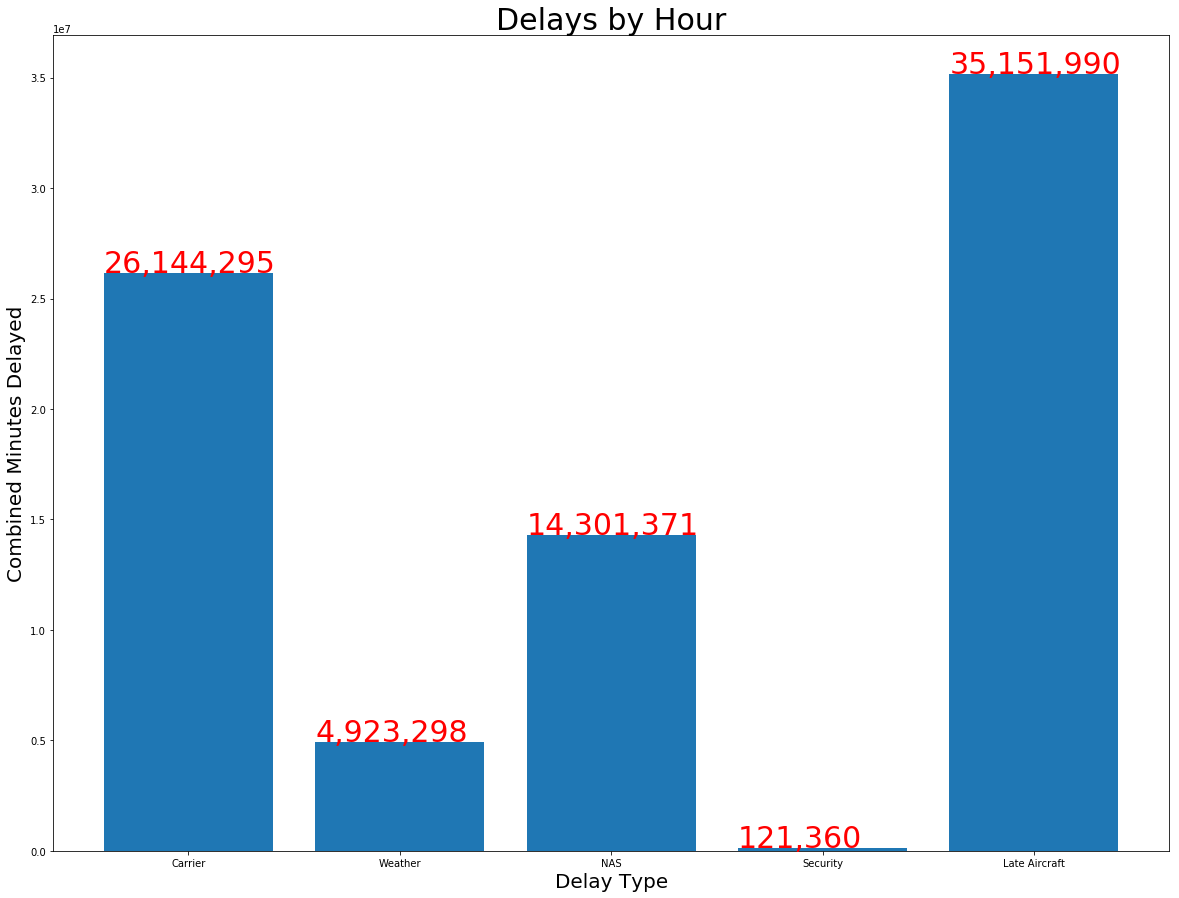

In [9]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, delay_count)
plt.title("Delays by Hour", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Combined Minutes Delayed', fontsize =20)
for a,b in zip(range(5), delay_count):
    plt.text(a - .4, b +50000, str("{:,}".format(int(b))), fontsize =30, color ='r')
plt.show()

In [10]:
# copy df to play with delay columns
type_freq = delay.copy()

In [11]:
# apply 1 if there was a delay and 0 if no delay so can count up frequency
d_type = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for d in d_type:
    type_freq[d] = type_freq[d].apply(lambda x: 1 if x > 0.0 else 0 )

In [12]:
freq_of_delay = [type_freq[d].sum() for d in d_type]

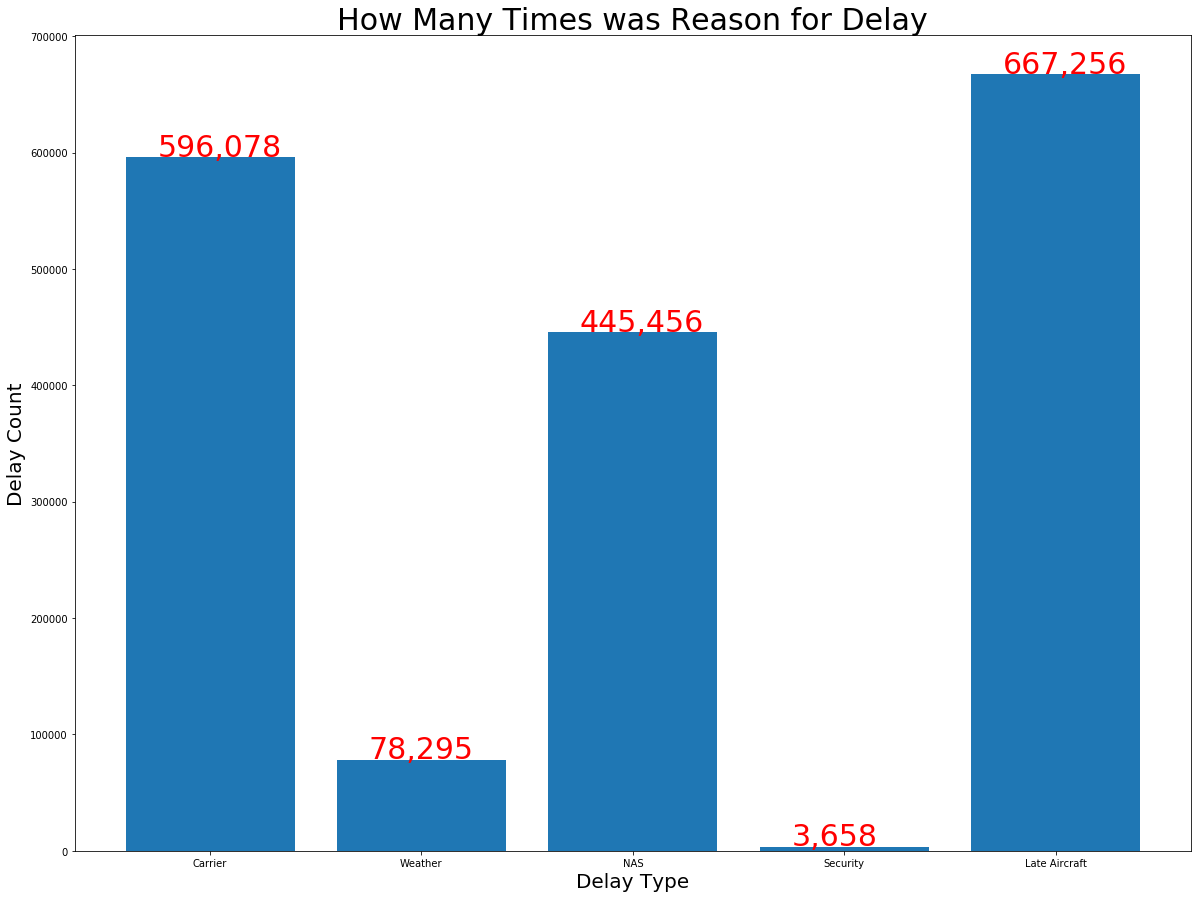

In [13]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, freq_of_delay)
plt.title("How Many Times was Reason for Delay", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Delay Count', fontsize =20)
for a,b in zip(range(5), freq_of_delay):
    plt.text(a - .25, b +1000, "{:,}".format(int(b)), fontsize =30, color ='r')
plt.show()

In [14]:
avg_delay = [round(delay_count[x]/freq_of_delay[x],0) for x in range(5)]

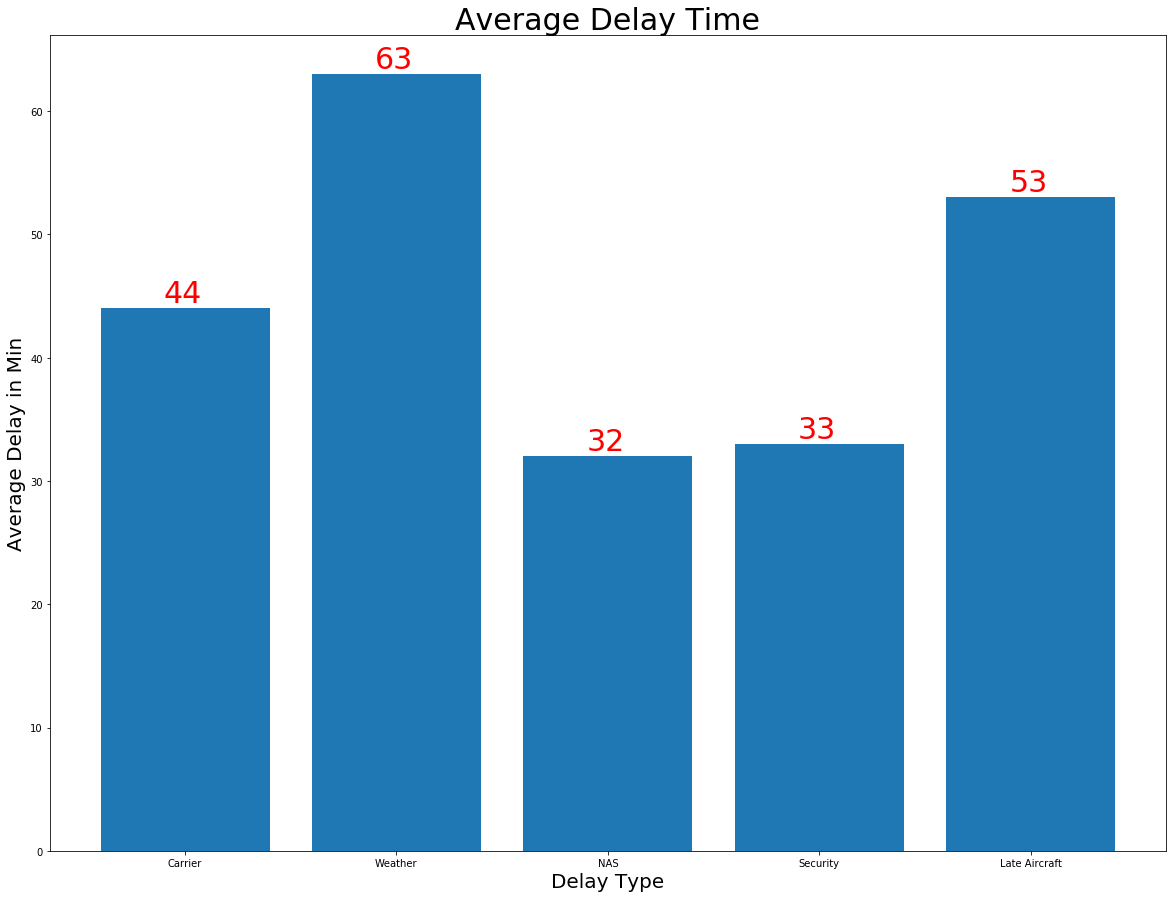

In [15]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, avg_delay )
plt.title("Average Delay Time", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Average Delay in Min', fontsize =20)
for a,b in zip(range(5), avg_delay):
    plt.text(a - .1, b + .5, str(int(b)), fontsize =30, color ='r')
plt.show()